In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import cv2

In [2]:
cal_nokia = plt.imread("nokia_calib.jpg")
white_nokia = plt.imread("nokia_white.jpg")

In [3]:
"NOKIA"
#at y = 1000
pixel_nokia = [2269, 2121, 1972, 1955, 1919, 1876]
wav_nokia = [667.8, 584.33, 501.57, 471.31, 447.14, 338.86]


In [87]:
"RasPi"
# pixel_raspi = [168,120,98]
# wav_raspi = [584.33, 471.31, 447.14]
pixel_raspi = [2060, 1758.5,1726.5,1567.5, 1358.5]
wav_raspi = [584.33, 501.57, 471.31, 447.14, 338.86]

In [5]:
"SAMSUNG"
#at y = 1400
pixel_sam =[1640, 2002, 2391, 2435, 2535]#, 2648]
wav_sam = [667.8, 584.33, 501.57, 471.31, 447.14]#, 338.86]


In [121]:
# sam_cal = plt.imread("samsung_calib_f.jpg")
# sam_inc = plt.imread("samsung_incandescent_f.jpg")
# sam_led1 = plt.imread("samsung_led1_f.jpg")
# sam_led2 = plt.imread("samsung_led2_f.jpg")

sam_cal = plt.imread("samsung_calib.jpg")
sam_inc = plt.imread("samsung_incandescent.jpg")
sam_led1 = plt.imread("samsung_led1.jpg")
sam_led2 = plt.imread("samsung_led2.jpg")

# RasPi_cal = plt.imread("Helium_rawpy.png")
# RasPi_inc = plt.imread("Incan_rawpy.png")

RasPi_cal = plt.imread("raspi_helium.jpg")
RasPi_inc = plt.imread("raspi_incan.jpg")


RasPi_cal_gray = cv2.cvtColor(RasPi_cal, cv2.COLOR_BGR2GRAY)

In [88]:
# plt.figure(dpi = 150)
# plt.imshow(RasPi_cal)

In [89]:
# line_cal = RasPi_cal_gray[1350,1700:1800]
# plt.figure(dpi=100)
# plt.plot(line_cal, 'k')

In [78]:
pixel_raspi = np.where(line_cal > 50)[0]#.tolist()

# for i in range(2,len(pixel_raspi)+2): 
#     if np.abs(pixel_raspi[i-1]-pixel_raspi[i-2]) < 2:
#         pixel_raspi.remove(pixel_raspi[i])
        

In [131]:
def wav_to_pix(fit, wav_i, wav_f):
    x_i = (wav_i - fit[0])/fit[1]
    x_f = (wav_f - fit[0])/fit[1]
    return int(x_i), int(x_f)

plt.rcParams['axes.titlesize'] = 15
plt.rcParams.update({'font.size': 15})

def Spectral_Sensitivity(pixel, wav, y, yy, cal, image, savgol, source):
    z1 = np.polyfit(pixel, wav, 1)
    p1 = np.poly1d(z1)
    
    wav_i, wav_f = 350, 750
    x_i, x_f = wav_to_pix(p1, wav_i, wav_f)
    wavelength = np.linspace(wav_i, wav_f, np.abs(x_f-x_i))
    
    plt.figure(figsize=[15,4], facecolor = 'w')
    plt.subplot(1,2,1)
    plt.title("Calibration Image")
    plt.imshow(cal)
    plt.subplot(1,2,2)
    plt.title("Calibration Curve")
    plt.plot(pixel, wav, 'ro')
    plt.plot(pixel,p1(pixel),'k--')
    plt.ylabel("Wavelength, nm")
    plt.xlabel("Horizontal Pixel Location")
    plt.annotate('y='+ str(p1), (x_i,550))
    plt.grid()
    plt.show()
   
    
    if p1[1] < 0:
        ROI = image[y-20:y+20,x_f:x_i]
        linescan = ROI[yy,:]/255
        r,g,b = np.flip(linescan[:,0]),np.flip(linescan[:,1]),np.flip(linescan[:,2])
        #r,g,b = r/r.max(), g/g.max(), b/b.max
        
    else:
        ROI = image[y-20:y+20,x_i:x_f]
        linescan = ROI[yy,:]/255
        r,g,b = linescan[:,0],linescan[:,1],linescan[:,2]
        #r,g,b = r/r.max(), g/g.max(), b/b.max()


    
    plt.figure(figsize=[15,4], facecolor = 'w')
    plt.subplot(1,2,1)
    plt.title("Diffracted Light Source (" + str(source) + ")")
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title("ROI")
    plt.imshow(ROI)
    plt.axhline(yy, color = "k", marker = '.', lw = 5, alpha = 0.8)
    plt.axhline(yy, color = "y", marker = '.', lw = 3, alpha = 0.9)
    plt.show()

    plt.figure(figsize=[15,6], facecolor = 'w')
    plt.subplot(1,2,1)
    plt.title("Intensity Profile")
    plt.plot(wavelength, r, 'r')
    plt.plot(wavelength, g, 'g')
    plt.plot(wavelength, b, 'b')
    plt.xlabel("Wavelength")
    plt.legend(["Red","Green", "Blue"])
    plt.grid()
        
    r = savgol_filter(r,savgol,2)
    g = savgol_filter(g,savgol,2)
    b = savgol_filter(b,savgol,2)
    
    plt.subplot(1,2,2)
    plt.title("Smoothened Spectral Sensitivity")
    plt.plot(wavelength, r, 'r')
    plt.plot(wavelength, g, 'g')
    plt.plot(wavelength, b, 'b')
    plt.legend(["Red","Green", "Blue"])
    plt.xlabel("Wavelength")
    plt.grid()
    plt.show()


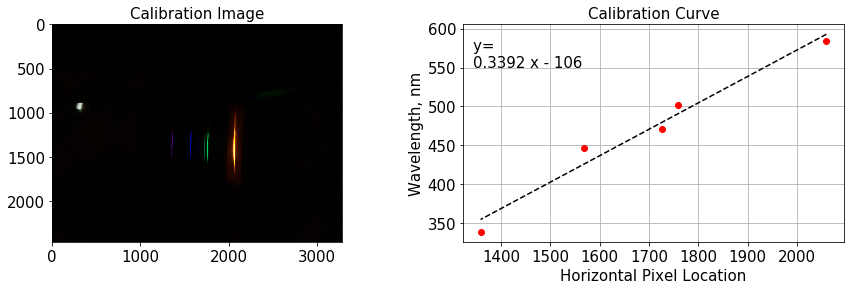

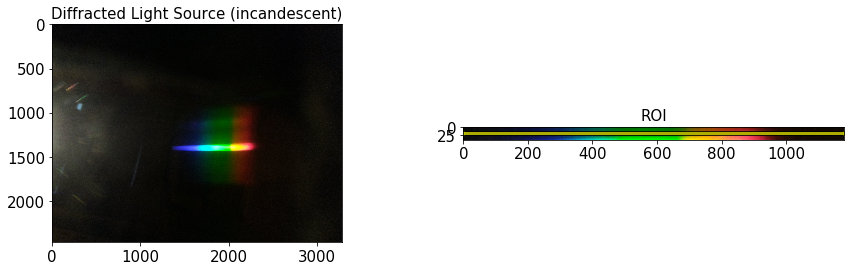

c:\users\rene\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


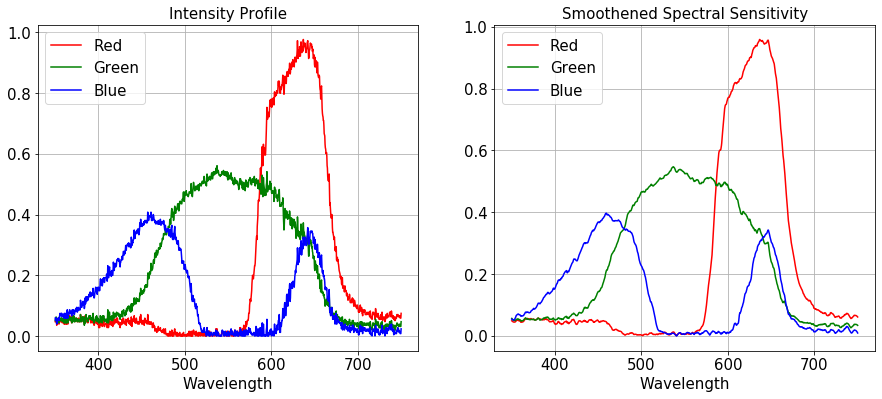

In [132]:
Spectral_Sensitivity(pixel_raspi, wav_raspi, 1350, 20, RasPi_cal, RasPi_inc, 21, "incandescent")

In [98]:
# Spectral_Sensitivity(pixel_nokia, wav_nokia, 820, 10, cal_nokia, white_nokia, savgol = 31)

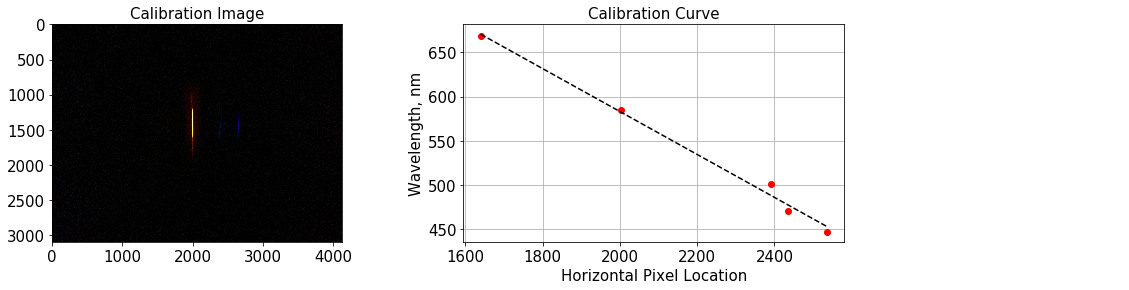

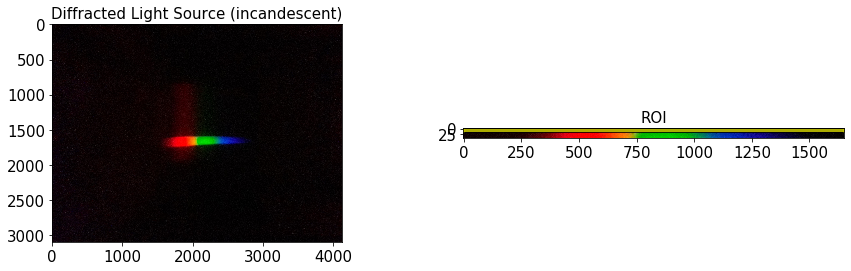

c:\users\rene\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


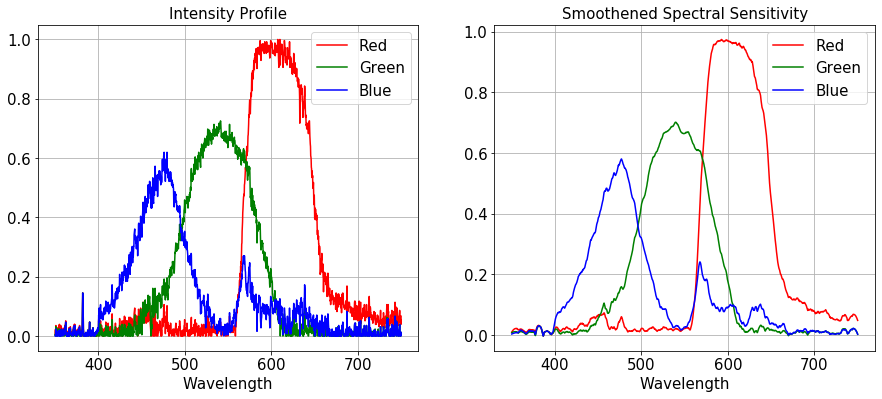

In [139]:
Spectral_Sensitivity(pixel_sam, wav_sam, 1620, 8, sam_cal, sam_inc, 41, "incandescent")

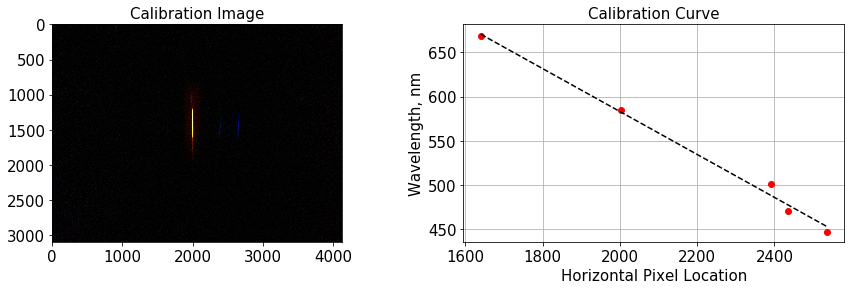

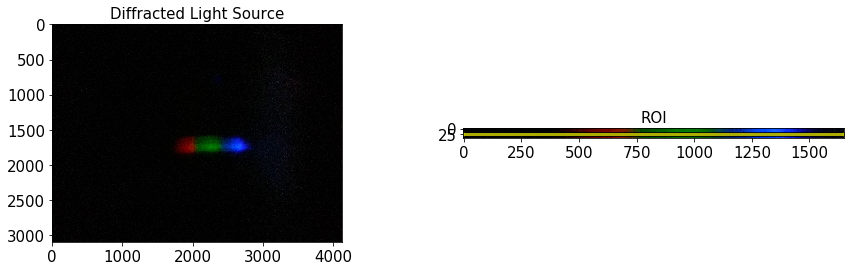

c:\users\rene\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


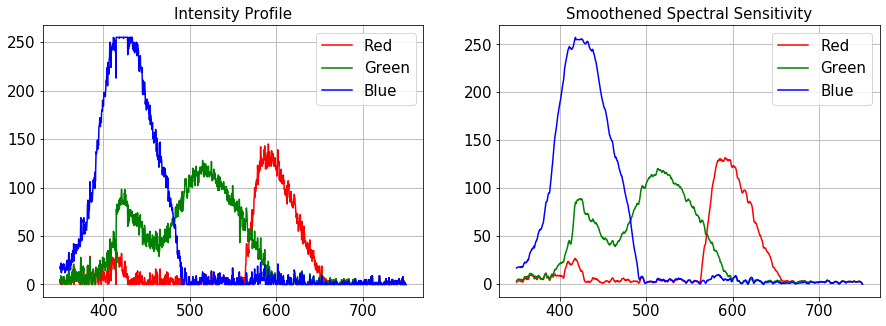

In [11]:
Spectral_Sensitivity(pixel_sam, wav_sam, 1750, 25, sam_cal, sam_led1, savgol = 31)

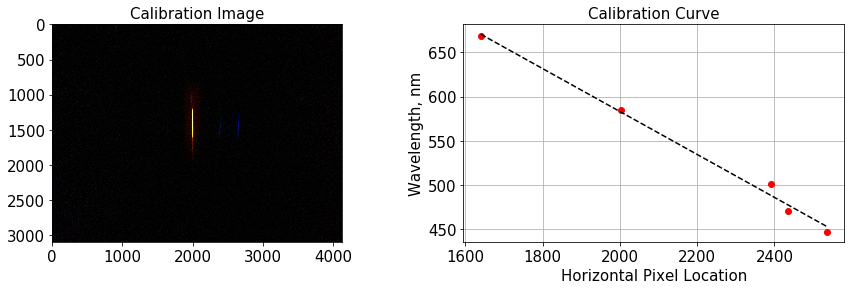

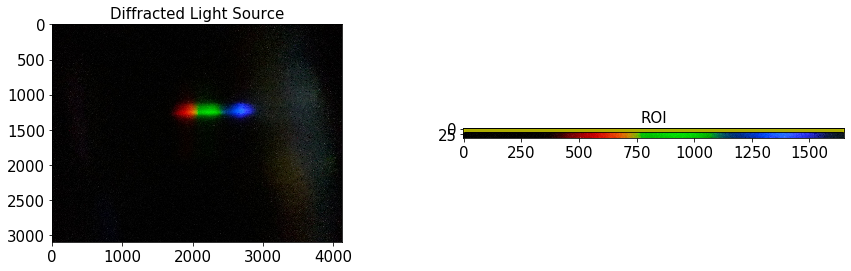

c:\users\rene\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


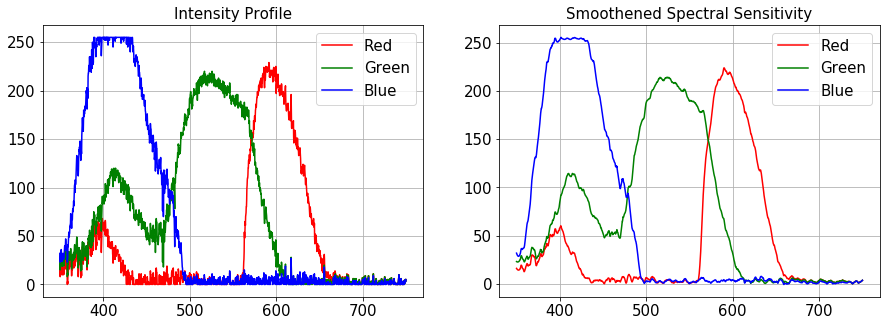

In [12]:
Spectral_Sensitivity(pixel_sam, wav_sam, 1250, 5, sam_cal, sam_led2, savgol = 31)

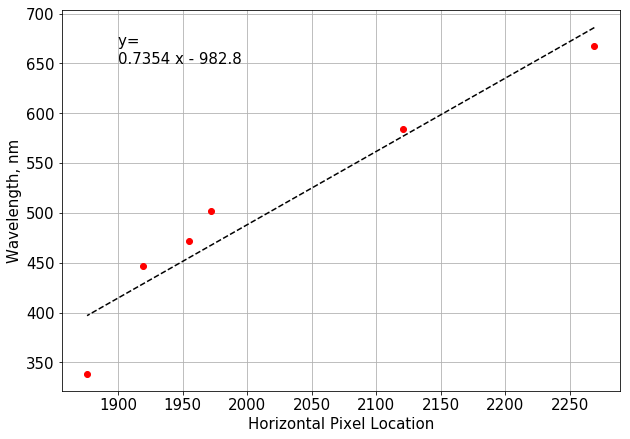

In [115]:
plt.figure(figsize=[10,7], facecolor = 'w')
plt.rcParams['axes.titlesize'] = 10
plt.rcParams.update({'font.size': 15})
plt.plot(pixel, wav, 'ro')
plt.plot(pixel,p1(pixel),'k--')
plt.ylabel("Wavelength, nm")
plt.xlabel("Horizontal Pixel Location")
plt.annotate('y='+ str(p1), (1900,650))
plt.grid()

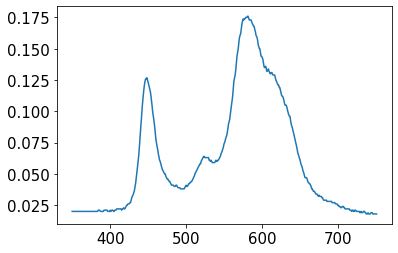

In [71]:
led1 = np.loadtxt("Romina phone light.txt")
led1 = np.interp(wavelength, led1[:,0], led1[:,1])
plt.plot(wavelength, led1)
led2 = np.loadtxt("Rene phone light.txt")

In [47]:
z1 = np.polyfit(pixel_sam, wav_sam, 1)
p1 = np.poly1d(z1)

wav_i, wav_f = 350, 750
x_i, x_f = wav_to_pix(p1, wav_i, wav_f)
wavelength = np.linspace(wav_i, wav_f, np.abs(x_f-x_i))

In [81]:
image = sam_led1
savgol = 51
y = 1675
yy = 10
if p1[1] < 0:
        ROI = image[y-50:y+50,x_f:x_i]
        linescan = ROI[yy,:]
        r,g,b = np.flip(linescan[:,0]),np.flip(linescan[:,1]),np.flip(linescan[:,2])

else:
    ROI = image[y-50:y+50,x_i:x_f]
    linescan = ROI[yy,:]
    r,g,b = linescan[:,0],linescan[:,1],linescan[:,2]
    
r,g,b = r/led1, g/led1, b/led1
r,g,b = r/r.max(), g/g.max(), b/b.max()

c:\users\rene\anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


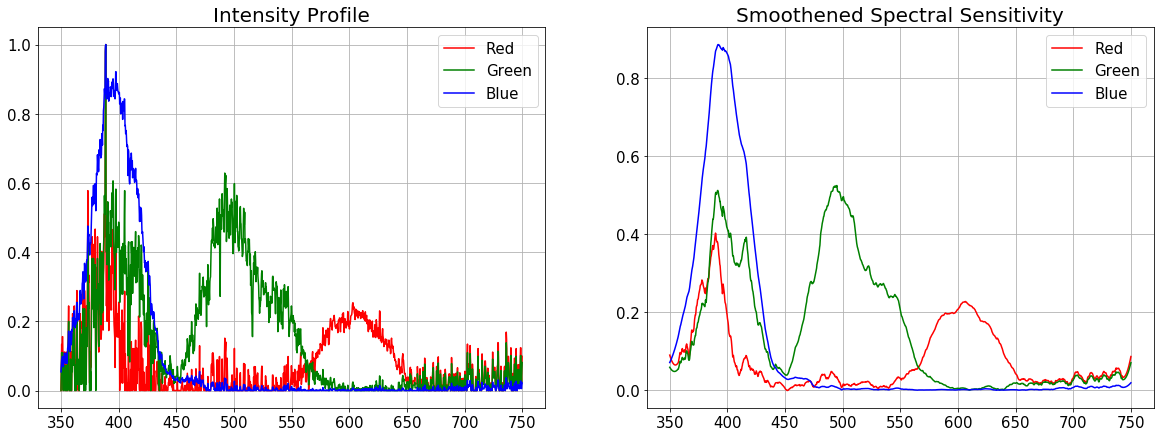

In [82]:
plt.figure(figsize=[20,7], facecolor = 'w')
plt.rcParams['axes.titlesize'] = 20
plt.rcParams.update({'font.size': 15})
plt.subplot(1,2,1)
plt.title("Intensity Profile")
plt.plot(wavelength, r, 'r')
plt.plot(wavelength, g, 'g')
plt.plot(wavelength, b, 'b')
plt.legend(["Red","Green", "Blue"])
plt.grid()
plt.subplot(1,2,2)
plt.title("Smoothened Spectral Sensitivity")
plt.plot(wavelength, savgol_filter(r,savgol,2), 'r')
plt.plot(wavelength, savgol_filter(g,savgol,2), 'g')
plt.plot(wavelength, savgol_filter(b,savgol,2), 'b')
plt.legend(["Red","Green", "Blue"])
plt.grid()
plt.show()

IndexError: too many indices for array

In [69]:
led1

array([0.02 , 0.02 , 0.02 , ..., 0.018, 0.018, 0.018])

In [64]:
help(np.interp)

Help on function interp in module numpy.lib.function_base:

interp(x, xp, fp, left=None, right=None, period=None)
    One-dimensional linear interpolation.
    
    Returns the one-dimensional piecewise linear interpolant to a function
    with given discrete data points (`xp`, `fp`), evaluated at `x`.
    
    Parameters
    ----------
    x : array_like
        The x-coordinates at which to evaluate the interpolated values.
    
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points, same length as `xp`.
    
    left : optional float or complex corresponding to fp
        Value to return for `x < xp[0]`, default is `fp[0]`.
    
    right : optional float or complex corresponding to fp
       